<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Garch%2C_Monte_Carlo%2C_LSTM%2C_SVM_and_Random_Forest_11_feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib==3.1.3

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid !important;
    color: black !important;
}
</style>

In [3]:
!pip install arch
!pip install tensor
!pip install tensorflow
!pip install statsmodels
!pip install keras
!pip install sklearn
import tensorflow
import keras
import sklearn
from pathlib import Path
from datetime import datetime, timedelta
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from arch import arch_model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import os
import glob
import csv
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error

     |████████████████████████████████| 902 kB 22.8 MB/s 
     |████████████████████████████████| 9.8 MB 49.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 3.1 MB 17.7 MB/s 
     |████████████████████████████████| 57 kB 1.9 MB/s 
     |████████████████████████████████| 296 kB 35.9 MB/s 
     |████████████████████████████████| 80 kB 7.7 MB/s 
     |████████████████████████████████| 2.0 MB 6.1 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 251 kB 45.8 MB/s 
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71568 sha256=9163e36411582696f552474c32ec789387358b4ce524c0c1d2e09eb9e665e950
  Stored in directory: /root/.cache/pip/wheels/6

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Master thesis/Vix.csv"

In [6]:
VI_db=pd.read_csv("/content/drive/MyDrive/Master thesis/VIX.csv")

In [7]:
VI_db

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1990,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,03/01/1990,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,04/01/1990,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,05/01/1990,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,08/01/1990,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...,...
7929,22/06/2021,17.910000,18.320000,15.760000,16.660000,16.660000,0
7930,23/06/2021,16.250000,16.840000,14.860000,16.320000,16.320000,0
7931,24/06/2021,15.990000,16.049999,14.190000,15.970000,15.970000,0
7932,25/06/2021,16.040001,16.170000,15.210000,15.620000,15.620000,0


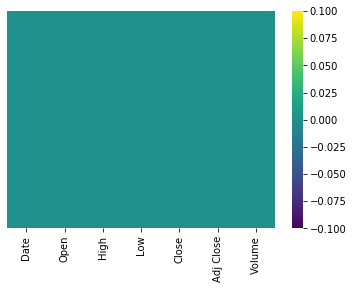

In [8]:
import seaborn as sns
sns.heatmap(VI_db.isnull(), yticklabels=False, cmap="viridis")

In [9]:
import numpy as np

In [10]:
#DATA TYPE FORMATTING OF THE REQUIRED FEATURES
VI_db['Date'] = pd.to_datetime(VI_db['Date'])
VI_db['log_price'] = np.log(VI_db['Close'])
VI_db['pct_change'] = VI_db['log_price'].diff()
VI_db['st_dev'] = VI_db['pct_change'].rolling(window=30, center=False).std()


In [11]:
VI_db['Volatility'] = VI_db['st_dev']*(252**0.5)

In [12]:
VI_db.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume,log_price,pct_change,st_dev,Volatility
0,1990-02-01,17.240000,17.240000,17.240000,17.240000,17.240000,0,2.847232,NaN,NaN,NaN
1,1990-03-01,18.190001,18.190001,18.190001,18.190001,18.190001,0,2.900872,0.053640,NaN,NaN
2,1990-04-01,19.219999,19.219999,19.219999,19.219999,19.219999,0,2.955951,0.055079,NaN,NaN
3,1990-05-01,20.110001,20.110001,20.110001,20.110001,20.110001,0,3.001217,0.045266,NaN,NaN
4,1990-08-01,20.260000,20.260000,20.260000,20.260000,20.260000,0,3.008648,0.007431,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,1990-05-17,17.270000,17.270000,17.270000,17.270000,17.270000,0,2.848971,-0.025159,0.069642,1.105535
96,1990-05-18,17.200001,17.200001,17.200001,17.200001,17.200001,0,2.844909,-0.004061,0.069416,1.101950
97,1990-05-21,16.719999,16.719999,16.719999,16.719999,16.719999,0,2.816606,-0.028304,0.069241,1.099169
98,1990-05-22,17.840000,17.840000,17.840000,17.840000,17.840000,0,2.881443,0.064838,0.070293,1.115870


In [21]:
df.iloc[:, 9:10].values


array([[0.89358872],
       [1.33428262],
       [0.88196488],
       ...,
       [1.49021561],
       [1.12274356],
       [1.14826017]])

In [22]:
df['Volatility'].head(20)

Date
1990-01-03    0.893589
1990-01-05    1.334283
1990-01-06    0.881965
1990-01-08    1.712147
1990-01-10    0.947622
1990-01-11    0.618401
1990-02-03    0.895341
1990-02-04    1.017414
1990-02-05    1.335973
1990-02-07    1.268275
1990-02-08    1.723761
1990-02-10    0.943967
1990-02-11    0.603746
1990-02-13    1.072026
1990-02-14    1.091692
1990-02-15    1.133728
1990-02-16    1.136526
1990-02-20    1.166584
1990-02-21    1.144704
1990-02-22    1.157712
Name: Volatility, dtype: float64

In [15]:
# Set 'Date' as index


In [16]:
to_plt = VI_db.sort_values(by = 'Date').set_index('Date')

Text(0.5, 1.0, 'Vix Rolling Volatility considering 30 Time Periods with Standard Deviation Annualized')

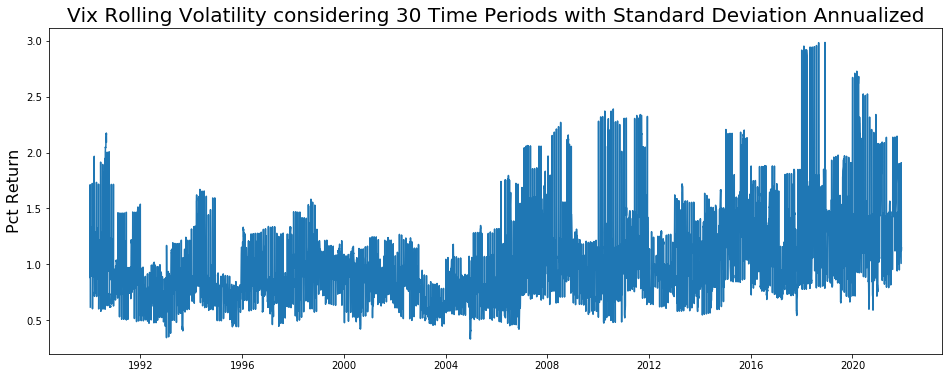

In [17]:
plt.figure(figsize=(16,6))
plt.plot(to_plt['Volatility'])
plt.ylabel('Pct Return', fontsize=16)
plt.title('Vix Rolling Volatility considering 30 Time Periods with Standard Deviation Annualized', fontsize=20)

In [18]:
df=to_plt.dropna()

In [19]:
vol = df['Volatility'] * 100

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7904 entries, 1990-01-03 to 2021-12-05
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        7904 non-null   float64
 1   High        7904 non-null   float64
 2   Low         7904 non-null   float64
 3   Close       7904 non-null   float64
 4   Adj Close   7904 non-null   float64
 5   Volume      7904 non-null   int64  
 6   log_price   7904 non-null   float64
 7   pct_change  7904 non-null   float64
 8   st_dev      7904 non-null   float64
 9   Volatility  7904 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 679.2 KB


In [23]:
# To check if there is null value in any of the column
df.isnull().any()

Open          False
High          False
Low           False
Close         False
Adj Close     False
Volume        False
log_price     False
pct_change    False
st_dev        False
Volatility    False
dtype: bool

In [24]:
# Replacing the missing values with df.mean()
VI_db.replace([np.inf, -np.inf], np.nan, inplace=True)
VI_db.fillna(df.mean(), inplace=True)

In [25]:
#Performing the ADF test to identify if the return series is stationary or non-stationary

In [26]:
result = adfuller(df.Volatility)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.631603
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [27]:
#Volatility Prediction using Garch(3,1)

In [28]:
GARCH_Mod = arch_model(vol, vol='Garch', p=3, o=0, q=1, dist='Normal')

In [29]:
#GARCH SUMMARY

In [30]:
re = GARCH_Mod = arch_model(vol, vol='Garch', p=3, o=0, q=1, dist='Normal')

In [31]:
#GARCH SUMMARY

In [32]:
res = GARCH_Mod.fit(disp='off')
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Volatility   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -38027.9
Distribution:                  Normal   AIC:                           76067.8
Method:            Maximum Likelihood   BIC:                           76109.7
                                        No. Observations:                 7904
Date:                Fri, Feb 11 2022   Df Residuals:                     7903
Time:                        09:55:39   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            88.8884      0.975     91.129      0.000 [ 86.977, 90.800]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        110.8323     42.483      2.609  9.084e-03 [ 27.567,1.941e+02]
alpha[1]       0.4793  5.058e-02      9.476  2.640e-21   [  0.380,  0.578]
alpha[2]   1.2435e-09      0.101  1.235e-08      1.000   [ -0.197,  0.197]
alpha[3]       0.0000  8.964e-02      0.000      1.000   [ -0.176,  0.176]
beta[1]        0.5048      0.175      2.890  3.856e-03   [  0.162,  0.847]
==========================================================================

Covariance estimator: robust
"""

In [33]:
#CREATING FORECASTED VOLATILITY FEATURE
# The below is straightforward. i will use the garch function provided by the arch python module to get omega, beta and alpha.
#following the formula σ2t=ω+α1a2t−1+β1σ2t−1, i execute the following code. th ecorrect formula for forecast_vol should be:
#0.01 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid2 + res.conditional_volatility2 * res.params['beta[1]'])

In [34]:
df['forecast_vol'] = 0.01 * np.sqrt(res.params['omega'] + res.params['alpha[1]']* res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])

In [35]:
df['Volatility'].head(20)

Date
1990-01-03    0.893589
1990-01-05    1.334283
1990-01-06    0.881965
1990-01-08    1.712147
1990-01-10    0.947622
1990-01-11    0.618401
1990-02-03    0.895341
1990-02-04    1.017414
1990-02-05    1.335973
1990-02-07    1.268275
1990-02-08    1.723761
1990-02-10    0.943967
1990-02-11    0.603746
1990-02-13    1.072026
1990-02-14    1.091692
1990-02-15    1.133728
1990-02-16    1.136526
1990-02-20    1.166584
1990-02-21    1.144704
1990-02-22    1.157712
Name: Volatility, dtype: float64

In [36]:
df['forecast_vol'].head(20)

Date
1990-01-03    0.251570
1990-01-05    0.371623
1990-01-06    0.284285
1990-01-08    0.613758
1990-01-10    0.450428
1990-01-11    0.385432
1990-02-03    0.293414
1990-02-04    0.249915
1990-02-05    0.372032
1990-02-07    0.387209
1990-02-08    0.648702
1990-02-10    0.474294
1990-02-11    0.404476
1990-02-13    0.331270
1990-02-14    0.293580
1990-02-15    0.288653
1990-02-16    0.287285
1990-02-20    0.299504
1990-02-21    0.296188
1990-02-22    0.300002
Name: forecast_vol, dtype: float64

In [37]:
pip install openpyxl

In [38]:
df['Volatility'].to_excel('g_a.xlsx') #to export actual value of Garch Model

In [39]:
df['forecast_vol'].to_excel('g_p.xlsx')#to export predicted value of Garch Model

In [40]:
#PLOTTING ACTUAL VOLATILITY VS FORECASTED VOLATILITY

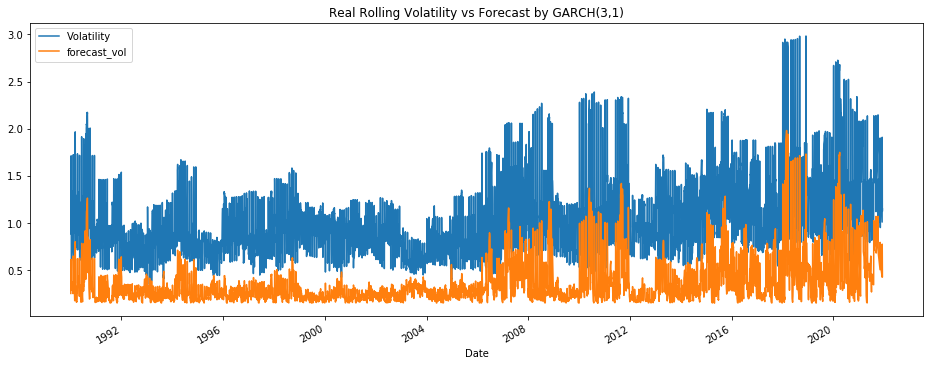

In [41]:
plt.figure(figsize=(16,6))
df["Volatility"].plot()
df["forecast_vol"].plot()
plt.title("Real Rolling Volatility vs Forecast by GARCH(3,1)")
plt.legend()
plt.show()

In [42]:
#Calculating RMSE value for GARCH Model
print('RMSE calculated for GARCH(3,1) model:', np.sqrt(metrics.mean_squared_error(df.loc[df.index[1000:], 'Volatility'], df.loc[df.index[1000:], 'forecast_vol'])))

RMSE calculated for GARCH(3,1) model: 0.7096122252850938


In [43]:
print('MAE calculated for GARCH(3,1) model:', MAE(df.loc[df.index[1000:], 'Volatility'], df.loc[df.index[1000:], 'forecast_vol']))

MAE calculated for GARCH(3,1) model: 0.6689068286747392


In [44]:
print('MAPE calculated for GARCH:', mean_absolute_percentage_error(df.loc[df.index[1000:], 'Volatility'], df.loc[df.index[1000:], 'forecast_vol' ]))

MAPE calculated for GARCH: 0.6595012286192034


In [45]:
#Volatility Prediction using LSTM

In [46]:
training_set = df.iloc[:, 9:10].values
X_train = []
y_train = []
for i in range(100, df.shape[0]):
    X_train.append(training_set[i-100:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
df.shape

(7904, 11)

In [48]:
#Preparing X_train for RNN using LSTM

In [49]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [50]:
#Creating RNN with LSTM

In [52]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin
#Initiliasing the RNN
def model():
  regressor = Sequential()
  regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=50, activation = "selu", kernel_initializer="lecun_normal", kernel_constraint=keras.constraints.max_norm(1.), return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=50,  activation = "selu", kernel_initializer="lecun_normal", kernel_constraint=keras.constraints.max_norm(1.)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))
  regressor.compile(optimizer='nadam', loss='mean_squared_error', metrics= ['accuracy'])
  return regressor

  estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=32)
  estimator.fit(X_train, y_train, epochs = 50, batch_size = 32)
  #regressor = KerasRegressor(build_fn=lstm_model, epochs=50, batch_size=32, verbose=0)
  #regressor.fit(X_train, y_train, epochs = 50, batch_size =32)

  # Initiliasing the RNN
 


In [53]:
len(model.get_weights())

AttributeError: ignored

In [55]:
#Grid Search
from sklearn.model_selection import GridSearchCV
batch_size = [8,16, 32, 48]
epochs = [1]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [56]:
 estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=32)

In [57]:
clf1 = GridSearchCV(estimator, param_grid)

In [58]:
gs = clf1.fit(X_train, y_train)

976/976 [==============================] - 127s 125ms/step - loss: 0.1065 - accuracy: 0.0000e+00


In [59]:
gs.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': <keras.wrappers.scikit_learn.KerasRegressor at 0x7f88d14f5a90>,
 'estimator__batch_size': 32,
 'estimator__build_fn': <function __main__.model>,
 'estimator__epochs': 50,
 'n_jobs': None,
 'param_grid': {'batch_size': [8, 16, 32, 48], 'epochs': [1]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [60]:
 estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=32)

In [61]:
#regressor.evaluate(X_train, y_train, verbose=0, batch_size = 32)
gs.score(X_train, y_train)

976/976 [==============================] - 25s 25ms/step - loss: 0.0739 - accuracy: 0.0000e+00


-0.0739220380783081

In [62]:
from sklearn.model_selection import GridSearchCV

In [65]:
gs.save('Volatility_VI.h5')

AttributeError: ignored

In [66]:
predicted_vol = gs.predict(X_train)

In [67]:
p_d = pd.DataFrame(df.iloc[100:, 9:10].values)

In [ ]:
p_d.head(20)

,0
0,1.283156
1,1.255701
2,1.259477
3,0.724509
4,1.262567
5,0.881149
6,1.893820
7,1.712935
8,0.600804
9,0.751765


In [68]:
p_d.to_excel('lst_a.xlsx') #print actual value

In [69]:
p_d_2=pd.DataFrame(predicted_vol)

In [70]:
p_d_2.to_excel('lst_p.xlsx') # print predicted value

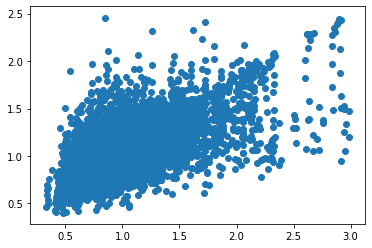

In [71]:
plt.scatter(p_d, p_d_2)

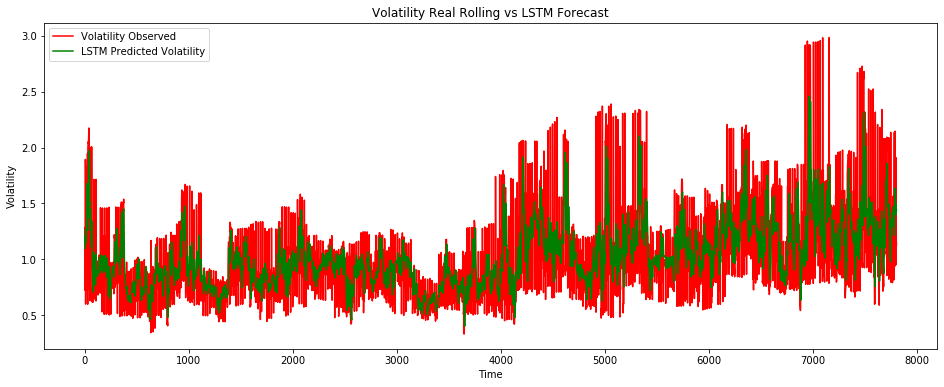

In [72]:
#Visualising the results
plt.figure(figsize=(16,6))
plt.plot(df.iloc[100:, 9:10].values, color = 'red', label = 'Volatility Observed')
plt.plot(predicted_vol, color = 'green', label = 'LSTM Predicted Volatility')
plt.title('Volatility Real Rolling vs LSTM Forecast')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [73]:
gs.score(X_train, y_train)

976/976 [==============================] - 29s 29ms/step - loss: 0.0739 - accuracy: 0.0000e+00


-0.0739220380783081

In [74]:
gs.score(df.iloc[100:, 9:10], predicted_vol)


976/976 [==============================] - 3s 3ms/step - loss: 0.7886 - accuracy: 0.0000e+00


-0.7885988354682922

In [75]:
print('RMSE calculated for LSTM model:', np.sqrt(metrics.mean_squared_error(df.iloc[100:, 9:10].values, predicted_vol)))

RMSE calculated for LSTM model: 0.2718861425856857


In [76]:
print('MAE calculated for LSTM model:', MAE(df.iloc[100:,9:10].values, predicted_vol))

MAE calculated for LSTM model: 0.18350163552589888


In [77]:
print('MAPE calculated for LSTM model:', mean_absolute_percentage_error(df.iloc[100:, 9:10], predicted_vol))

MAPE calculated for LSTM model: 0.19126352013478892


In [78]:
#Volatility Prediction using Monte Carlo Simulation

In [79]:
returns_M=df['Volatility']

In [80]:
last_Close = df.Volatility[-1]

In [ ]:
# Number of Simulations

In [83]:
num_simulations = 100000
num_days = 252

In [84]:
#from scipy.stats import levy

In [85]:
simulation_df = pd.DataFrame()
for x in range(num_simulations):
    count = 0
    daily_vol = returns_M.std()
    
    price_series = []
    ## try different distributions
    price = last_Close * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series



In [86]:
MC_a=df['Volatility'].head(252)

In [87]:
MC_a.to_excel('MC_a.xlsx') # to export actual values of MC Model

In [88]:
simulation_df.to_excel('MC.xlsx') #for top 252 days predicted value using MC

ValueError: ignored

In [ ]:
#plotting Monte Carlo Volatility

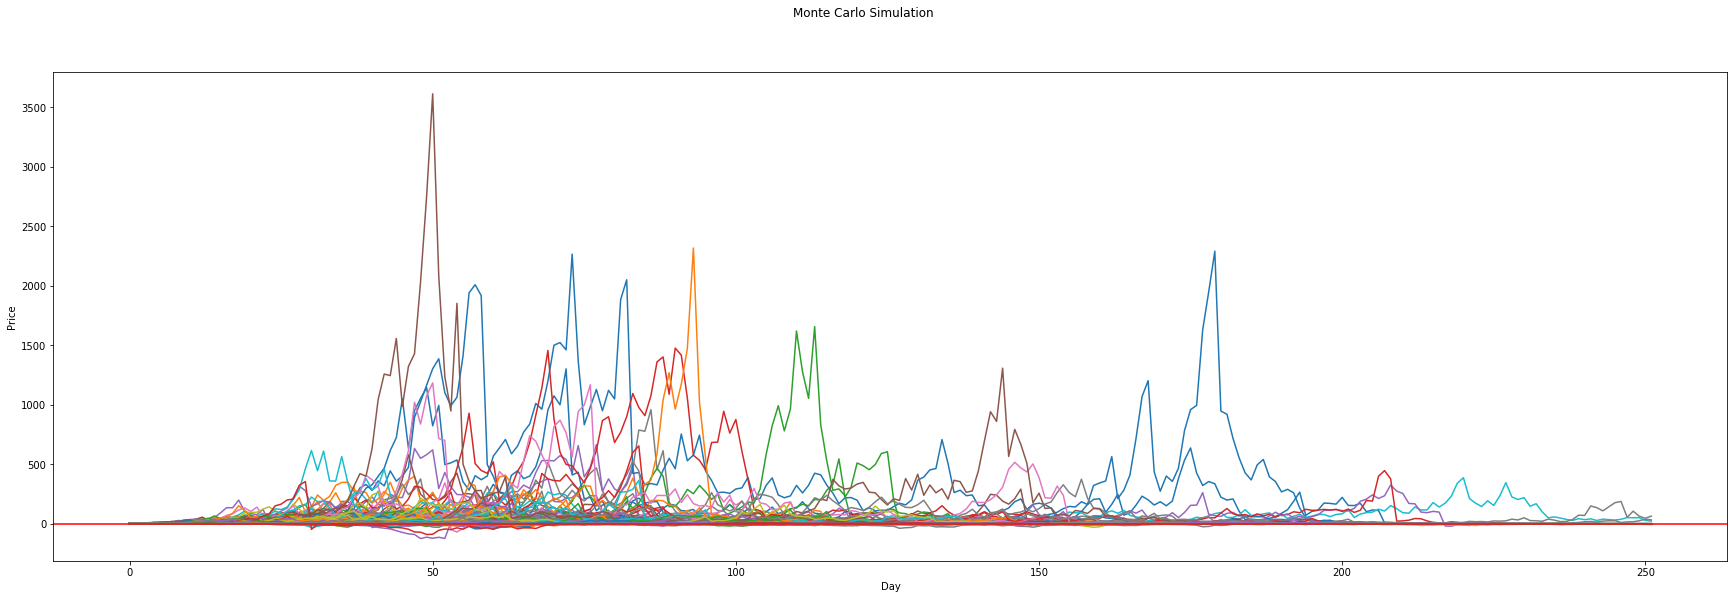

In [ ]:
fig = plt.figure(figsize=(30,9))
fig.suptitle('Monte Carlo Simulation')
plt.plot(simulation_df)
plt.axhline(y = last_Close, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [89]:
print('RMSE calculated for MC model:', np.sqrt(metrics.mean_squared_error(df.iloc[0:252:, 9:10].values,  simulation_df[0])))

RMSE calculated for MC model: 1.1400996382040385


In [90]:
print('MAE calculated for MC model:',MAE(df.iloc[0:252, 9:10].values, simulation_df[0]))

MAE calculated for MC model: 1.0563262855952582


In [91]:
print('MAPE calculated for MC model:',mean_absolute_percentage_error(df.iloc[0:252, 9:10].values, simulation_df[0]))

MAPE calculated for MC model: 0.9656985968745695


In [ ]:
#Volatility Prediction Using SVM

In [ ]:
#Preparing testing and training dataset

In [92]:
training_set = df.iloc[:, 9:10].values
X_tr = []
y_tr = []
for i in range(10, df.shape[0]):
    X_tr.append(training_set[i-10:i,0])
    y_tr.append(training_set[i,0])
X_tr, y_tr = np.array(X_tr), np.array(y_tr)

In [123]:
print(df.shape[0])

7904


In [124]:
print(training_set[i-10:i,0])

[1.46500145 1.00573572 1.90141505 1.59056028 0.95085884 1.46544159
 1.00883287 1.90900987 1.49021561 1.12274356]


In [93]:
df.iloc[:,9:10]

,Volatility
Date,
1990-01-03,0.893589
1990-01-05,1.334283
1990-01-06,0.881965
1990-01-08,1.712147
1990-01-10,0.947622
...,...
2021-12-01,1.008833
2021-12-02,1.909010
2021-12-03,1.490216


In [ ]:
#RBF model

In [94]:
svr_rbf = SVR(kernel='rbf', C=5, gamma=9, epsilon=0.01)

In [95]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svr_rbf, parameters)

In [96]:
y_rbf = clf.fit(X_tr, y_tr).predict(X_tr)

In [97]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': SVR(C=5, epsilon=0.01, gamma=9),
 'estimator__C': 5,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.01,
 'estimator__gamma': 9,
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [98]:
predicted_vol_rbf = np.exp(y_rbf)

In [99]:
print(metrics.r2_score(y_tr, y_rbf))

0.5122842521234788


In [ ]:
#Linear Model

In [100]:
svr_linear = SVR(kernel='linear', C=9, gamma = 7, epsilon=0.01)

In [101]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1,10]}
clf1 = GridSearchCV(svr_linear, parameters)

In [102]:
clf1.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': SVR(C=9, epsilon=0.01, gamma=7, kernel='linear'),
 'estimator__C': 9,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.01,
 'estimator__gamma': 7,
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [103]:
y_linear = clf1.fit(X_tr, y_tr).predict(X_tr)

In [104]:
clf1.score(X_tr, y_tr)

0.5122842521234788

In [105]:
predicted_vol_linear = np.exp(y_linear)

In [106]:
p_d_s_o = pd.DataFrame(df.iloc[10:, 9:10].values)

In [107]:
p_d_s_R = pd.DataFrame(predicted_vol_rbf)

In [108]:
p_d_s_l = pd.DataFrame(predicted_vol_linear)

In [109]:
p_d_s_o = pd.DataFrame(df.iloc[10:, 9:10].values) #actual values

In [110]:
p_d_s_R.to_excel('SVR_A.xlsx') #print actual values

In [111]:
p_d_s_R.to_excel('SVR_r_p.xlsx') #print RBF SVR value forecast

In [112]:
p_d_s_l.to_excel('SVR_r_p.xlsx') #print rbf svr value forecast

In [113]:
p_d_s_l.head(20)

,0
0,3.447266
1,4.963910
2,2.885342
3,2.086143
4,2.788607
5,2.916752
6,3.026878
7,3.056575
8,3.158408
9,3.136051


In [114]:
df.iloc[10:, 9:10].values

array([[1.72376114],
       [0.94396685],
       [0.60374578],
       ...,
       [1.49021561],
       [1.12274356],
       [1.14826017]])

In [115]:
p_d_s_l.head(20)

,0
0,3.447266
1,4.963910
2,2.885342
3,2.086143
4,2.788607
5,2.916752
6,3.026878
7,3.056575
8,3.158408
9,3.136051


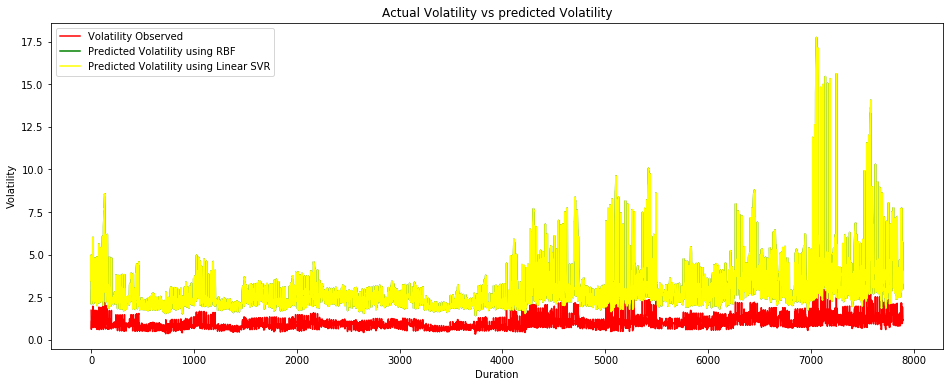

In [116]:
#Visualising the results

plt.figure(figsize=(16,6))
plt.plot(df.iloc[10:, 9:10].values, color = 'red', label = 'Volatility Observed')
plt.plot(predicted_vol_rbf, color = 'green', label = 'Predicted Volatility using RBF')
plt.plot(predicted_vol_linear, color = 'yellow', label = 'Predicted Volatility using Linear SVR')
#plt.plot(predicted_vol, color = 'green', label = 'LSTM Predicted Volatility')
plt.title('Actual Volatility vs predicted Volatility')
plt.xlabel('Duration')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [117]:
print('RMSE calculated for SVM:', np.sqrt(metrics.mean_squared_error(df.iloc[10:, 9:10].values, predicted_vol_linear)))

RMSE calculated for SVM: 2.2677232584732354


In [118]:
print('RMSE calculated for SVM:', np.sqrt(metrics.mean_squared_error(df.iloc[10:, 9:10].values, y_rbf)))

RMSE calculated for SVM: 0.2614755885413377


In [119]:
print('MAE calculated for SVM model:', MAE(df.iloc[10:, 9:10].values, predicted_vol_linear))

MAE calculated for SVM model: 1.9221314293816818


In [120]:
print('MAE calculated for SVM model:',MAE(df.iloc[10:, 9:10].values, y_rbf))

MAE calculated for SVM model: 0.14116210357305578


In [121]:
print('MAPE calculated for SVM model:',mean_absolute_percentage_error(df.iloc[10:, 9:10].values, predicted_vol_linear))

MAPE calculated for SVM model: 1.9794326120665864


In [122]:
print('MAPE calculated for SVM model:',mean_absolute_percentage_error(df.iloc[10:, 9:10].values,y_rbf))

MAPE calculated for SVM model: 0.1420456125157482


In [ ]:
#Volatility prediction using Random Forest

In [ ]:
#Create Random Forest Regressor Model

In [136]:
ran_mod = RandomForestRegressor(n_estimators=50, verbose=4, random_state=42, n_jobs=-1)

In [137]:
rand_mod = ran_mod.fit(X_tr, y_tr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished


In [138]:
rand_mod.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 4,
 'warm_start': False}

In [139]:
rand_mod.score(X_tr, y_tr)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


0.9404159745429139

In [ ]:
#Predicted Volatility

In [140]:
predicted_vol_rand = rand_mod.predict(X_tr)
predicted_vol_rand

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


array([1.601092  , 1.00142458, 0.76469523, ..., 1.58770518, 1.18231383,
       1.12168416])

In [141]:
p_d_For = pd.DataFrame(predicted_vol_rand)

In [143]:
p_d_For.to_excel('rand_For_p.xlsx') #print predicted value

In [145]:
p_d_s_o.to_excel('rand_For_a.xlsx') #print actual values

In [147]:
p_d_For

,0
0,1.601092
1,1.001425
2,0.764695
3,0.988486
4,1.027611
...,...
7889,1.154308
7890,1.672240
7891,1.587705
7892,1.182314


In [ ]:
#plotting volatility observed, predicted Volatility using Random Forest

In [ ]:
#Visualising the results

In [148]:
print(df.iloc[10:,9:10])

            Volatility
Date                  
1990-02-08    1.723761
1990-02-10    0.943967
1990-02-11    0.603746
1990-02-13    1.072026
1990-02-14    1.091692
...                ...
2021-12-01    1.008833
2021-12-02    1.909010
2021-12-03    1.490216
2021-12-04    1.122744
2021-12-05    1.148260

[7894 rows x 1 columns]


In [152]:
print(df.iloc[:,9:10])

            Volatility
Date                  
1990-01-03    0.893589
1990-01-05    1.334283
1990-01-06    0.881965
1990-01-08    1.712147
1990-01-10    0.947622
...                ...
2021-12-01    1.008833
2021-12-02    1.909010
2021-12-03    1.490216
2021-12-04    1.122744
2021-12-05    1.148260

[7904 rows x 1 columns]


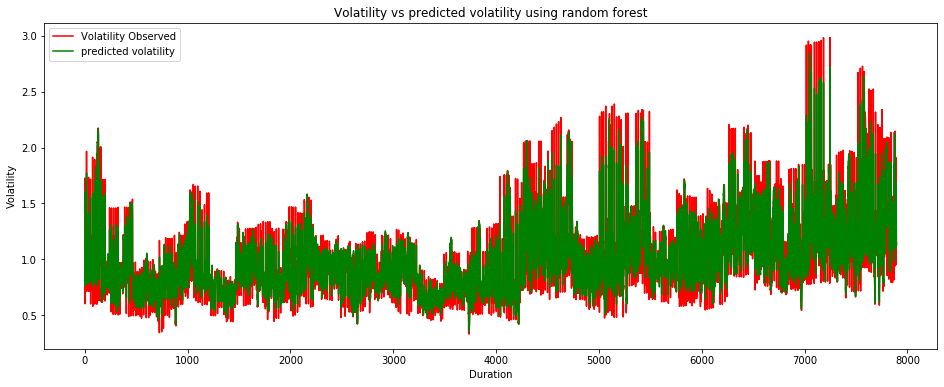

In [151]:
plt.figure(figsize=(16,6))
plt.plot(df.iloc[10:, 9:10].values, color = 'red', label = 'Volatility Observed')
plt.plot(predicted_vol_rand, color = 'green', label = 'predicted volatility')
plt.title('Volatility vs predicted volatility using random forest')
plt.xlabel('Duration')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [153]:
print('RMSE calculated for Random Forest:', np.sqrt(metrics.mean_squared_error(df.iloc[10:, 9:10].values, predicted_vol_rand)))

RMSE calculated for Random Forest: 0.09139294669083681


In [154]:
print('MAE calculated for Random Forest:',MAE(df.iloc[10:,9:10].values, predicted_vol_rand))

MAE calculated for Random Forest: 0.05512732712403428


In [155]:
print('MAPE calculated for Random Forest:', mean_absolute_percentage_error(y_rbf, predicted_vol_rand))

MAPE calculated for Random Forest: 0.1040726764666995
